
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Main Figure 3
-----

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import os
import sys

-----
##### Set up input / output directories

In [3]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [4]:
sys.path.append(str(root_dir))
import scripts.plotter as plotter
import scripts.utils as ut

-----
##### Load & prepare data 

In [209]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md_rev.txt'), sep='\t', index_col=0)
low_samples = kzm611_md[kzm611_md.SBS_Burden=='low'].index.tolist()

In [210]:
kzm611_sigs = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_signatures.tsv'), sep='\t', index_col=0)
kzm611_sigs_low = kzm611_sigs.loc[low_samples].copy()
kzm611_sigs.shape, kzm611_sigs_low.shape

((611, 70), (577, 70))

In [211]:
kzm611_md_low = kzm611_md[kzm611_md.SBS_Burden=='low'].copy()
kzm611_sbs_low = kzm611_sigs_low[[x for x in kzm611_sigs_low.columns if x.startswith('SBS')]].copy()
kzm611_sbs = kzm611_sigs[[x for x in kzm611_sigs.columns if x.startswith('SBS')]].copy()


In [212]:
pret_sbs = kzm611_sbs_low.loc[kzm611_md_low[kzm611_md_low.Therapy=='Pre-Therapy'].index.tolist()]
post_sbs = kzm611_sbs_low.loc[kzm611_md_low[kzm611_md_low.Therapy=='Post-Therapy'].index.tolist()]
pret_sbs.shape[0], post_sbs.shape[0]

(244, 333)

In [213]:
pn_sbs = kzm611_sbs_low.loc[kzm611_md_low[kzm611_md_low.Thr_State=='Primary-Naive'].index.tolist()]
at_sbs = kzm611_sbs_low.loc[kzm611_md_low[kzm611_md_low.Thr_State=='Advanced-Treated'].index.tolist()]
pn_sbs.shape[0], at_sbs.shape[0]

(232, 244)

In [21]:
print(pret_sbs.sum().sum(), post_sbs.sum().sum(), post_sbs[['SBS31', 'SBS35']].sum().sum())
post_sbs.sum().sum() - pret_sbs.sum().sum(), post_sbs[['SBS31', 'SBS35']].sum().sum() / post_sbs.sum().sum()


627956 1811556 235519


(1183600, 0.13000922963463454)

In [24]:
print(pret_sbs.sum().sum(), post_sbs.sum().sum(), post_sbs[thr_sbs].sum().sum())
print(post_sbs.sum().sum() - pret_sbs.sum().sum(), post_sbs[thr_sbs].sum().sum() / post_sbs.sum().sum())
post_sbs[thr_sbs].sum().sum() / (post_sbs.sum().sum() - pret_sbs.sum().sum())

627956 1811556 274480
1183600 0.15151615517268027


0.23190266982088542

In [25]:
print(pret_sbs.sum().sum(), post_sbs.sum().sum(), post_sbs[thr_sbs].sum().sum())
print(post_sbs.sum().sum() - pret_sbs.sum().sum(), post_sbs[thr_sbs].sum().sum() / post_sbs.sum().sum())
post_sbs[thr_sbs+thr_nov_sbs].sum().sum() / (post_sbs.sum().sum() - pret_sbs.sum().sum())

627956 1811556 274480
1183600 0.15151615517268027


0.40554325785738427

In [27]:
at_sbs[thr_sbs].sum().sum() / (at_sbs.sum().sum() - pn_sbs.sum().sum())

0.27290585811230633

In [28]:
at_sbs[thr_sbs+thr_nov_sbs].sum().sum() / (at_sbs.sum().sum() - pn_sbs.sum().sum())

0.4821980971426238

In [30]:
kzm611_sigs.loc[low_samples, thr_sbs+thr_nov_sbs].head()

,SBS11,SBS17b,SBS31,SBS35,SBS87,SBS288L2,SBS288L3,SBS288L4,SBS288L5
KiCS0002_321321,0,0,10876,4226,0,0,0,0,0
KiCS0003_285201,0,0,0,0,0,0,0,0,0
KiCS0003_285202,0,0,0,0,0,0,0,0,0
KiCS0003_20_15220_A_02_00,0,0,0,0,0,3976,0,3189,0
KiCS0005_300238,0,0,0,0,0,0,0,0,0


In [ ]:
pn_sbs = kzm611_sbs_low.loc[kzm611_md_low[kzm611_md_low.Thr_State=='Primary-Naive'].index.tolist()]
at_sbs = kzm611_sbs_low.loc[kzm611_md_low[kzm611_md_low.Thr_State=='Advanced-Treated'].index.tolist()]
pn_sbs.shape[0], at_sbs.shape[0]

(232, 244)

In [57]:
[x for x in kzm611_sbs.index if '135462' in x]

['I-H-135462-T1-2-D1-1']

In [ ]:
'I-H-135462-T1-2-D1-1'

-----------
## Panel a

In [214]:
plat_sbs = ['SBS31', 'SBS35']
plat_dbs = ['DBS5']
plat_nov_sbs = ['SBS288L5']
plat_nov_dbs = ['DBS78H2']
thr_sbs = ['SBS11', 'SBS17b', 'SBS31', 'SBS35', 'SBS87']
thr_nov_sbs = ['SBS288L2', 'SBS288L3', 'SBS288L4', 'SBS288L5']
thr_dbs = ['SBS288L5']

In [342]:
known = [kzm611_sigs_low.DBS5.sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('DBS')]].sum().sum(),
         kzm611_sigs_low[plat_sbs].sum().sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('SBS')]].sum().sum(),
         kzm611_sigs_low[thr_sbs].sum().sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('SBS')]].sum().sum() 
        ]

novel = [kzm611_sigs_low[plat_nov_dbs].sum().sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('DBS')]].sum().sum(),
         kzm611_sigs_low[plat_nov_sbs].sum().sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('SBS')]].sum().sum(),
         kzm611_sigs_low[thr_nov_sbs].sum().sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('SBS')]].sum().sum()
         ]
index = ['Therapy/\nPlatinum\nDBS', 'Platinum\nSBS', 'Therapy\nSBS']
df = pd.DataFrame({'COSMIC': known, 'Novel': novel}, index=index)
df = df * 100
df = df.round(2)
df

,COSMIC,Novel
Therapy/\nPlatinum\nDBS,13.50,25.67
Platinum\nSBS,9.68,2.25
Therapy\nSBS,11.23,8.70


In [216]:
df

,COSMIC,Novel
Therapy/Platinum\nDBS,13.50,25.67
Platinum\nSBS,9.68,2.25
Therapy\nSBS,11.23,8.70


[None, None, None, None, None, None]

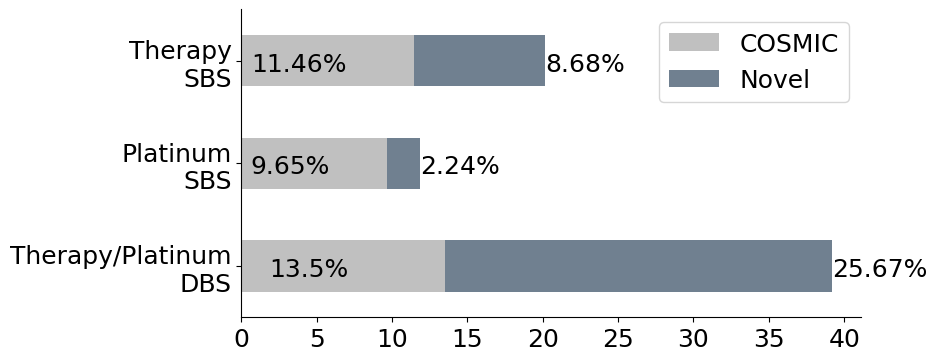

In [182]:
fig, ax = plt.subplots(figsize=(8,4))


df.plot.barh(stacked=True, ax=ax, color=['silver', 'slategrey'])
for i, v in enumerate(df.COSMIC):
    ax.text(v/3, i-0.1, f"{v}%", color='black', ha='center', fontsize=18)
    ax.text(v + df.Novel.iloc[i], i-0.1, f"{df.Novel.iloc[i]}%", color='black', fontsize=18)

ax.spines[['right', 'top']].set_visible(False)

#ax.set_facecolor('#f4f0eb')
h, l = ax.get_legend_handles_labels()
legend = ax.legend(h,l, fontsize=18)

plt.setp(ax.get_xticklabels(), horizontalalignment='center', fontsize=18)
plt.setp(ax.get_yticklabels(), fontsize=18)


#plt.savefig(os.path.join(fig_out, 'Fig_3a.pdf'), bbox_inches="tight")

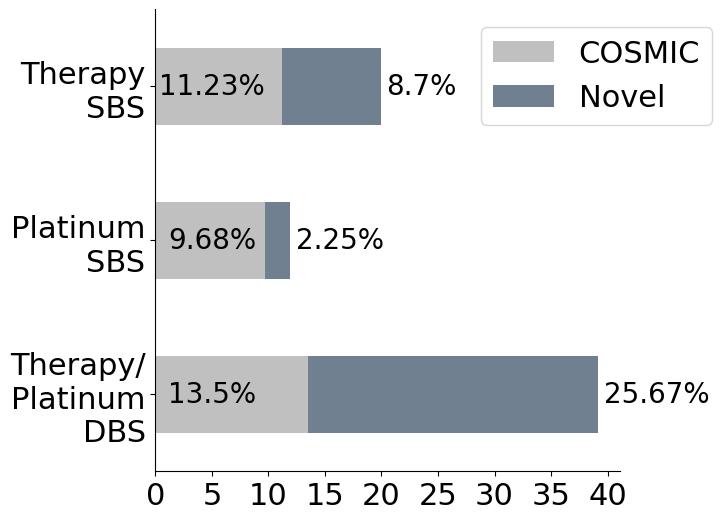

In [343]:
fig, ax = plt.subplots(figsize=(6,6))


df.plot.barh(stacked=True, ax=ax, color=['silver', 'slategrey'])
for i, v in enumerate(df.COSMIC):
    ax.text(5, i-0.05, f"{v}%", color='black', ha='center', fontsize=20)
    ax.text(v + df.Novel.iloc[i]+0.5, i-0.05, f"{df.Novel.iloc[i]}%", color='black', fontsize=20)

ax.spines[['right', 'top']].set_visible(False)

#ax.set_facecolor('#f4f0eb')
h, l = ax.get_legend_handles_labels()
legend = ax.legend(h,l, loc=(0.7, 0.75), fontsize=22)

plt.setp(ax.get_xticklabels(), horizontalalignment='center', fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=22)


plt.savefig(os.path.join(fig_out, 'Fig_3a_rev.pdf'), bbox_inches="tight")

-----------
## Panel b

In [218]:
kzm611_thr_low_mlt = ut.sigs_melt(kzm611_sigs.loc[low_samples, thr_sbs+thr_nov_sbs].copy())
kzm611_thr_all_mlt = ut.sigs_melt(kzm611_sigs[thr_sbs+thr_nov_sbs].copy())

kzm611_thr_all_mlt.head(3)

,Samples,Signatures,Mutations
0,I-H-108298-T1-1-D1-1,SBS11,0
1,I-H-108317-T1-1-D1-1,SBS11,0
2,I-H-108319-T1-1-D1-1,SBS11,0


In [271]:
from importlib import reload
reload(plotter)

<module 'scripts.plotter' from '/Users/mehdi/Documents/MyRepos/mutsigs_therapy/scripts/plotter.py'>

4.9


/Users/mehdi/Documents/MyRepos/mutsigs_therapy/scripts/plotter.py:759: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  x_values = list(np.linspace(start = X_start, stop = X_end, num = counts[i]))
/Users/mehdi/Documents/MyRepos/mutsigs_therapy/scripts/plotter.py:760: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x_values,y_values,color = "black",s=1.5)
/Users/mehdi/Documents/MyRepos/mutsigs_therapy/scripts/plotter.py:762: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

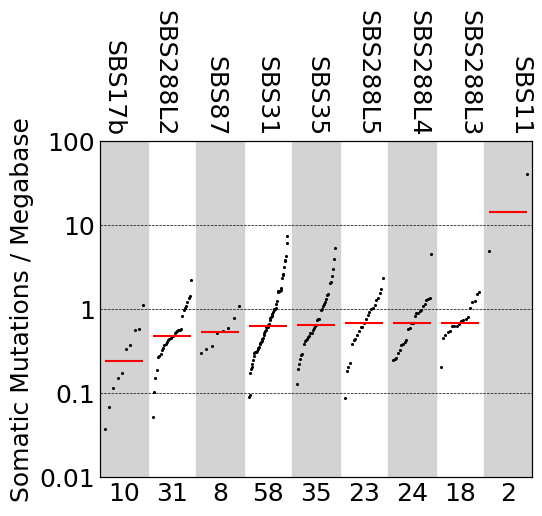

In [272]:
plotter.plotTMB_generic(kzm611_thr_all_mlt[['Signatures', 'Mutations']].copy(), scale='genome')
#plt.savefig(os.path.join(fig_out, 'Fig_3b_rev.pdf'), bbox_inches="tight")

-----------
## Panel c

In [220]:
logreg_coefs = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_drug_sigs_assocs.tsv'), sep='\t')
logreg_coefs.head()

,Features,Coefficient,Outcome,AUC,pvalue,Condition
0,SBS57,1.270805,TP53,0.800484,0.0,sbs_driver_noX_low
1,SBS8,1.183629,TP53,0.800484,0.0,sbs_driver_noX_low
2,SBS46,1.120452,TP53,0.800484,0.0,sbs_driver_noX_low
3,SBS1,1.110724,TP53,0.800484,0.0,sbs_driver_noX_low
4,SBS11,0.978337,TP53,0.800484,0.0,sbs_driver_noX_low


In [221]:
logreg_coefs_plat = logreg_coefs[logreg_coefs.Features=='Platinums']
logreg_coefs_plat.head()

,Features,Coefficient,Outcome,AUC,pvalue,Condition
27,Platinums,-1.855608,SBS5,0.797125,0.0214,class_sigs_X_all
45,Platinums,2.252720,SBS31,0.891280,0.0000,class_sigs_X_all
49,Platinums,2.671780,SBS35,0.892580,0.0000,class_sigs_X_all
75,Platinums,0.800497,SBS288L5,0.866849,0.0000,class_sigs_X_all
76,Platinums,1.683210,DBS2,0.815412,0.0000,class_sigs_X_all


In [222]:
logreg_coefs_plat[logreg_coefs_plat.Outcome=='DBS78H2']

,Features,Coefficient,Outcome,AUC,pvalue,Condition
90,Platinums,2.111057,DBS78H2,0.863049,0.0,class_sigs_X_all
548,Platinums,2.672708,DBS78H2,0.847859,0.0,class_sigs_noX_all


In [223]:
logreg_coefs_plat[logreg_coefs_plat.Outcome=='SBS288L5']

,Features,Coefficient,Outcome,AUC,pvalue,Condition
75,Platinums,0.800497,SBS288L5,0.866849,0.0,class_sigs_X_all
535,Platinums,1.818391,SBS288L5,0.856316,0.0,class_sigs_noX_all


In [224]:
logreg_coefs_temo = logreg_coefs[logreg_coefs.Features=='Temozolomide']
logreg_coefs_temo[logreg_coefs_temo.Outcome=='SBS288L3']

,Features,Coefficient,Outcome,AUC,pvalue,Condition
223,Temozolomide,3.092227,SBS288L3,0.812626,0.0010,agent_sigs_X_all
410,Temozolomide,3.094759,SBS288L3,0.812424,0.0004,agent_sigs_noX_all


In [225]:
logreg_coefs.Features.unique()

array(['SBS57', 'SBS8', 'SBS46', 'SBS1', 'SBS11', 'SBS12', 'SBS17b',
       'SBS18', 'SBS43', 'SV9', 'SV2', 'SV32A', 'Camptothecins:Platinums',
       'Anthracyclines:Platinums', 'Anthracyclines:Podophyllotoxins',
       'Podophyllotoxins', 'Podophyllotoxins:Radiation',
       'OtherAlkylators:VincaAlkaloids', 'Antimetabolites:VincaAlkaloids',
       'Platinums:Radiation', 'Antimetabolites:MustardGases',
       'VincaAlkaloids', 'Platinums:VincaAlkaloids', 'Platinums',
       'Hydrazines:Platinums', 'Antimetabolites:Podophyllotoxins',
       'Hydrazines', 'Anthracyclines', 'Antimetabolites',
       'MustardGases:VincaAlkaloids', 'Radiation',
       'VincaAlkaloids:Radiation', 'Anthracyclines:Radiation',
       'Camptothecins:MustardGases', 'OtherAlkylators',
       'MustardGases:Radiation', 'Hydrazines:MustardGases',
       'Camptothecins', 'Podophyllotoxins:VincaAlkaloids', 'MustardGases',
       'OtherAlkylators:Hydrazines', 'Hydrazines:Radiation',
       'Camptothecins:Hydrazines', 

In [226]:
logreg_coefs_test = logreg_coefs[logreg_coefs.Features=='Camptothecins:MustardGases']
logreg_coefs_test[logreg_coefs_test.Outcome=='SBS288L4']

,Features,Coefficient,Outcome,AUC,pvalue,Condition
71,Camptothecins:MustardGases,1.070083,SBS288L4,0.815596,0.0008,class_sigs_X_all


In [227]:
logreg_coefs[logreg_coefs.Outcome=='SBS288L4']

,Features,Coefficient,Outcome,AUC,pvalue,Condition
69,OtherAlkylators:Hydrazines,1.464561,SBS288L4,0.815596,0.0008,class_sigs_X_all
70,Hydrazines:Radiation,-1.447396,SBS288L4,0.815596,0.0008,class_sigs_X_all
71,Camptothecins:MustardGases,1.070083,SBS288L4,0.815596,0.0008,class_sigs_X_all
72,Radiation,0.991008,SBS288L4,0.815596,0.0008,class_sigs_X_all
224,Melphalan,2.469967,SBS288L4,0.770124,0.0094,agent_sigs_X_all
225,Carboplatin:Irinotecan,2.237805,SBS288L4,0.770124,0.0094,agent_sigs_X_all
226,Melphalan:Busulfan,-1.400560,SBS288L4,0.770124,0.0094,agent_sigs_X_all
227,Topotecan,1.116221,SBS288L4,0.770124,0.0094,agent_sigs_X_all
228,Busulfan,-0.810209,SBS288L4,0.770124,0.0094,agent_sigs_X_all
411,Melphalan,2.454393,SBS288L4,0.735820,0.0166,agent_sigs_noX_all


In [228]:
logreg_coefs[logreg_coefs.Outcome=='SBS288L2']

,Features,Coefficient,Outcome,AUC,pvalue,Condition
63,Camptothecins:MustardGases,0.850523,SBS288L2,0.821029,0.0000,class_sigs_X_all
64,Radiation,0.803997,SBS288L2,0.821029,0.0000,class_sigs_X_all
65,Podophyllotoxins:VincaAlkaloids,0.731348,SBS288L2,0.821029,0.0000,class_sigs_X_all
66,MustardGases,0.713171,SBS288L2,0.821029,0.0000,class_sigs_X_all
221,Cyclophosphamide:Etoposide,1.364628,SBS288L2,0.782516,0.0018,agent_sigs_X_all
222,Melphalan:Topotecan,1.060232,SBS288L2,0.782516,0.0018,agent_sigs_X_all
408,Cyclophosphamide,1.250932,SBS288L2,0.759420,0.0000,agent_sigs_noX_all
409,Etoposide,0.734087,SBS288L2,0.759420,0.0000,agent_sigs_noX_all
528,Camptothecins,0.888528,SBS288L2,0.806538,0.0000,class_sigs_noX_all
529,MustardGases,0.773153,SBS288L2,0.806538,0.0000,class_sigs_noX_all


In [229]:
logreg_coefs[logreg_coefs.Outcome=='DBS78H2']

,Features,Coefficient,Outcome,AUC,pvalue,Condition
90,Platinums,2.111057,DBS78H2,0.863049,0.0,class_sigs_X_all
91,Antimetabolites:Platinums,1.158579,DBS78H2,0.863049,0.0,class_sigs_X_all
92,Camptothecins:MustardGases,-0.834678,DBS78H2,0.863049,0.0,class_sigs_X_all
249,Cisplatin,1.809513,DBS78H2,0.850438,0.0,agent_sigs_X_all
250,Melphalan:Etoposide,-1.390861,DBS78H2,0.850438,0.0,agent_sigs_X_all
251,Methotrexate:Cisplatin,1.251190,DBS78H2,0.850438,0.0,agent_sigs_X_all
252,Carboplatin,1.117465,DBS78H2,0.850438,0.0,agent_sigs_X_all
431,Cisplatin,1.982175,DBS78H2,0.836690,0.0,agent_sigs_noX_all
432,Methotrexate,1.463264,DBS78H2,0.836690,0.0,agent_sigs_noX_all
433,Carboplatin,1.305492,DBS78H2,0.836690,0.0,agent_sigs_noX_all


In [230]:
logreg_coefs[logreg_coefs.Outcome=='SBS288L5']

,Features,Coefficient,Outcome,AUC,pvalue,Condition
73,Anthracyclines:Platinums,1.645471,SBS288L5,0.866849,0.0,class_sigs_X_all
74,Camptothecins,-1.014476,SBS288L5,0.866849,0.0,class_sigs_X_all
75,Platinums,0.800497,SBS288L5,0.866849,0.0,class_sigs_X_all
229,Cyclophosphamide:Carboplatin,2.780143,SBS288L5,0.887612,0.0,agent_sigs_X_all
230,Cisplatin:Doxorubicin,1.949811,SBS288L5,0.887612,0.0,agent_sigs_X_all
231,Methotrexate:Etoposide,1.176361,SBS288L5,0.887612,0.0,agent_sigs_X_all
232,Topotecan,-1.135346,SBS288L5,0.887612,0.0,agent_sigs_X_all
415,Methotrexate,1.830859,SBS288L5,0.851005,0.0,agent_sigs_noX_all
416,Carboplatin,1.434790,SBS288L5,0.851005,0.0,agent_sigs_noX_all
417,Cytarabine,-0.886113,SBS288L5,0.851005,0.0,agent_sigs_noX_all


In [231]:
logreg_coefs[logreg_coefs.Outcome=='SBS288L3']

,Features,Coefficient,Outcome,AUC,pvalue,Condition
67,Hydrazines,2.274213,SBS288L3,0.858283,0.0004,class_sigs_X_all
68,Radiation,1.300568,SBS288L3,0.858283,0.0004,class_sigs_X_all
223,Temozolomide,3.092227,SBS288L3,0.812626,0.0010,agent_sigs_X_all
410,Temozolomide,3.094759,SBS288L3,0.812424,0.0004,agent_sigs_noX_all
532,Hydrazines,2.274140,SBS288L3,0.858485,0.0000,class_sigs_noX_all
533,Radiation,1.291062,SBS288L3,0.858485,0.0000,class_sigs_noX_all


In [232]:
logreg_coefs[logreg_coefs.Features=='Doxorubicin']

,Features,Coefficient,Outcome,AUC,pvalue,Condition
188,Doxorubicin,-0.961404,SBS11,0.770311,0.0258,agent_sigs_X_all
219,Doxorubicin,-0.748212,SBS43,0.689847,0.0286,agent_sigs_X_all
380,Doxorubicin,0.836383,SBS2,0.718783,0.0162,agent_sigs_noX_all
385,Doxorubicin,-0.910998,SBS11,0.738337,0.0356,agent_sigs_noX_all
390,Doxorubicin,1.112761,SBS13,0.745503,0.0026,agent_sigs_noX_all
406,Doxorubicin,-1.114890,SBS43,0.684353,0.0022,agent_sigs_noX_all
418,Doxorubicin,0.766159,SBS288L5,0.851005,0.0000,agent_sigs_noX_all
455,Doxorubicin,0.901941,ID9,0.747397,0.0000,agent_sigs_noX_all
457,Doxorubicin,1.244627,ID17,0.821847,0.0486,agent_sigs_noX_all
466,Doxorubicin,0.798683,ID83I4H5,0.642230,0.0152,agent_sigs_noX_all


In [233]:
import numpy as np

In [234]:
np.exp(1.82)

6.171858449883554

In [235]:
logreg_coefs.Condition.unique()

array(['sbs_driver_noX_low', 'sv_driver_noX_low', 'class_sigs_X_all',
       'agent_sigs_X_all', 'id_driver_noX_low', 'agent_sigs_noX_all',
       'cnv_driver_noX_low', 'class_sigs_noX_all', 'dbs_driver_noX_low'],
      dtype=object)

In [334]:
from importlib import reload
reload(plotter)

<module 'scripts.plotter' from '/Users/mehdi/Documents/MyRepos/mutsigs_therapy/scripts/plotter.py'>

SBS288L3


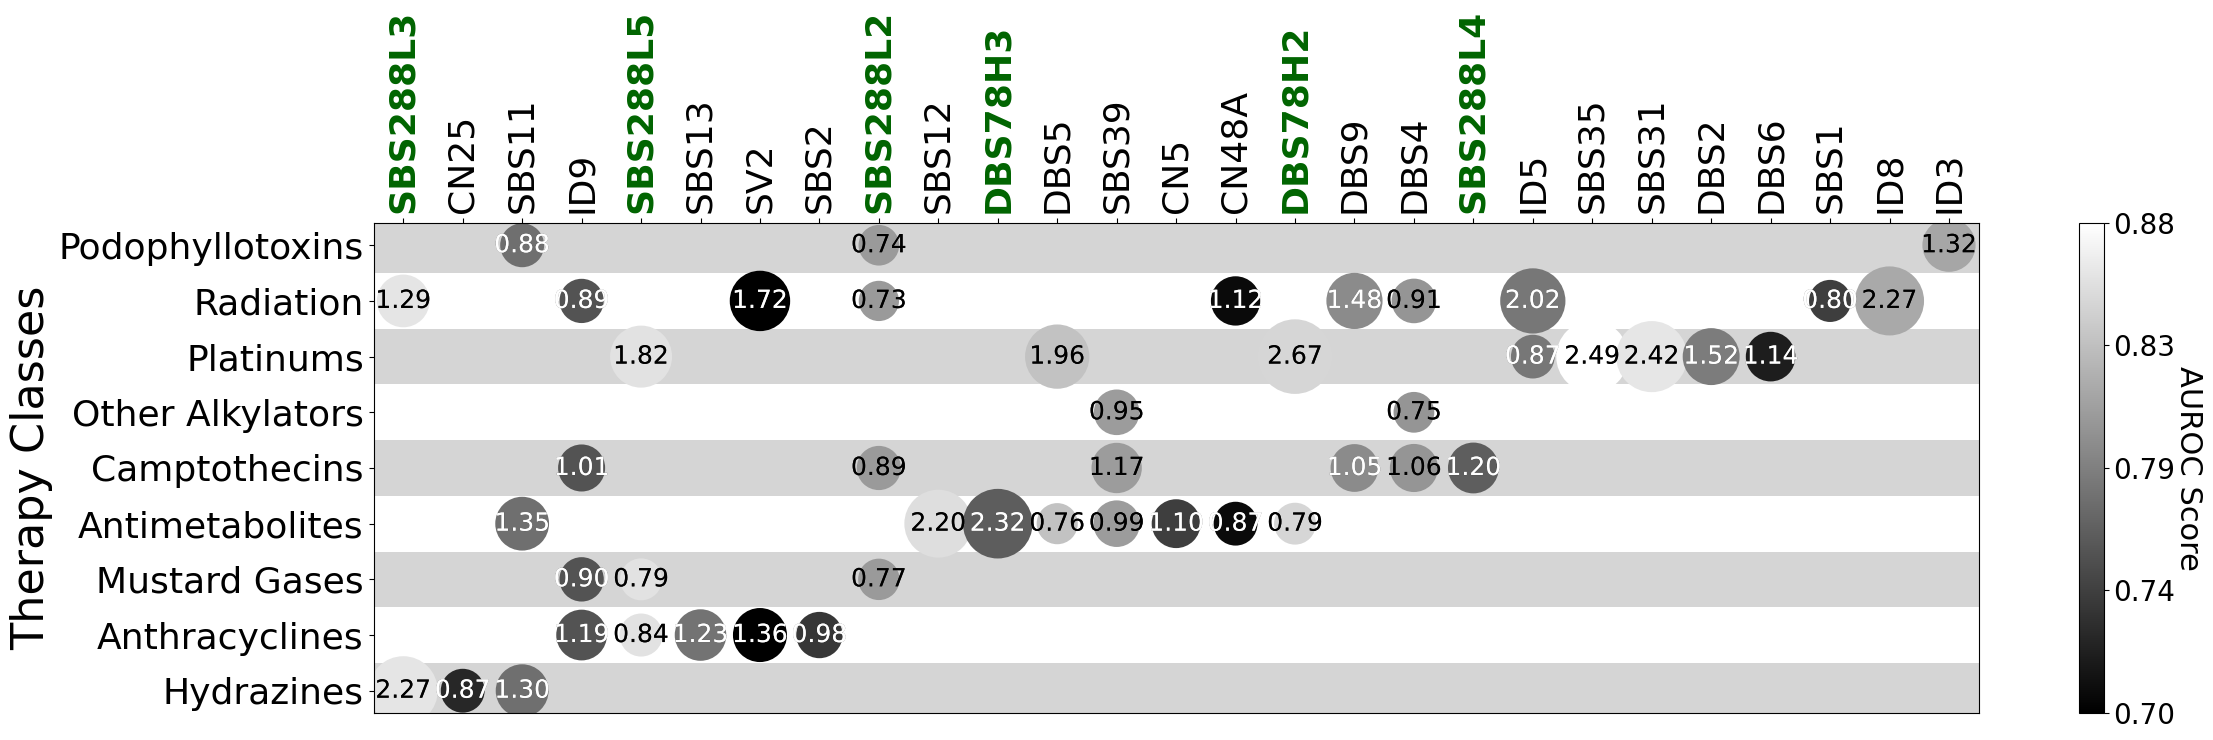

In [335]:
data = logreg_coefs[logreg_coefs.Condition=='class_sigs_noX_all'].copy()
data = data[data.AUC>=0.7]

drug_order = ['Radiation', 'Platinums', 'OtherAlkylators', 'Camptothecins',
              'Antimetabolites', 'MustardGases',
              'Anthracyclines', 'VincaAlkaloids', 'Hydrazines']

data['Drug_cat'] = pd.Categorical(
    data['Features'], 
    categories=drug_order, 
    ordered=True
)

data = data.sort_values(['Drug_cat'], ignore_index=True, ascending=[False])

rename_dict = {'OtherAlkylators': 'Other Alkylators', 'MustardGases': 'Mustard Gases', 'VincaAlkaloids': 'Vinca Alkaloids'}
data['Features'] = data['Features'].map(rename_dict).fillna(data['Features'])

plotter.coefs_scatter(data, os.path.join(fig_out, 'Fig_3c_adj2_rev.pdf'), positive_only=True, interactions='singles_only', ylab='Therapy Classes')

-----------
## Panel d

SBS1


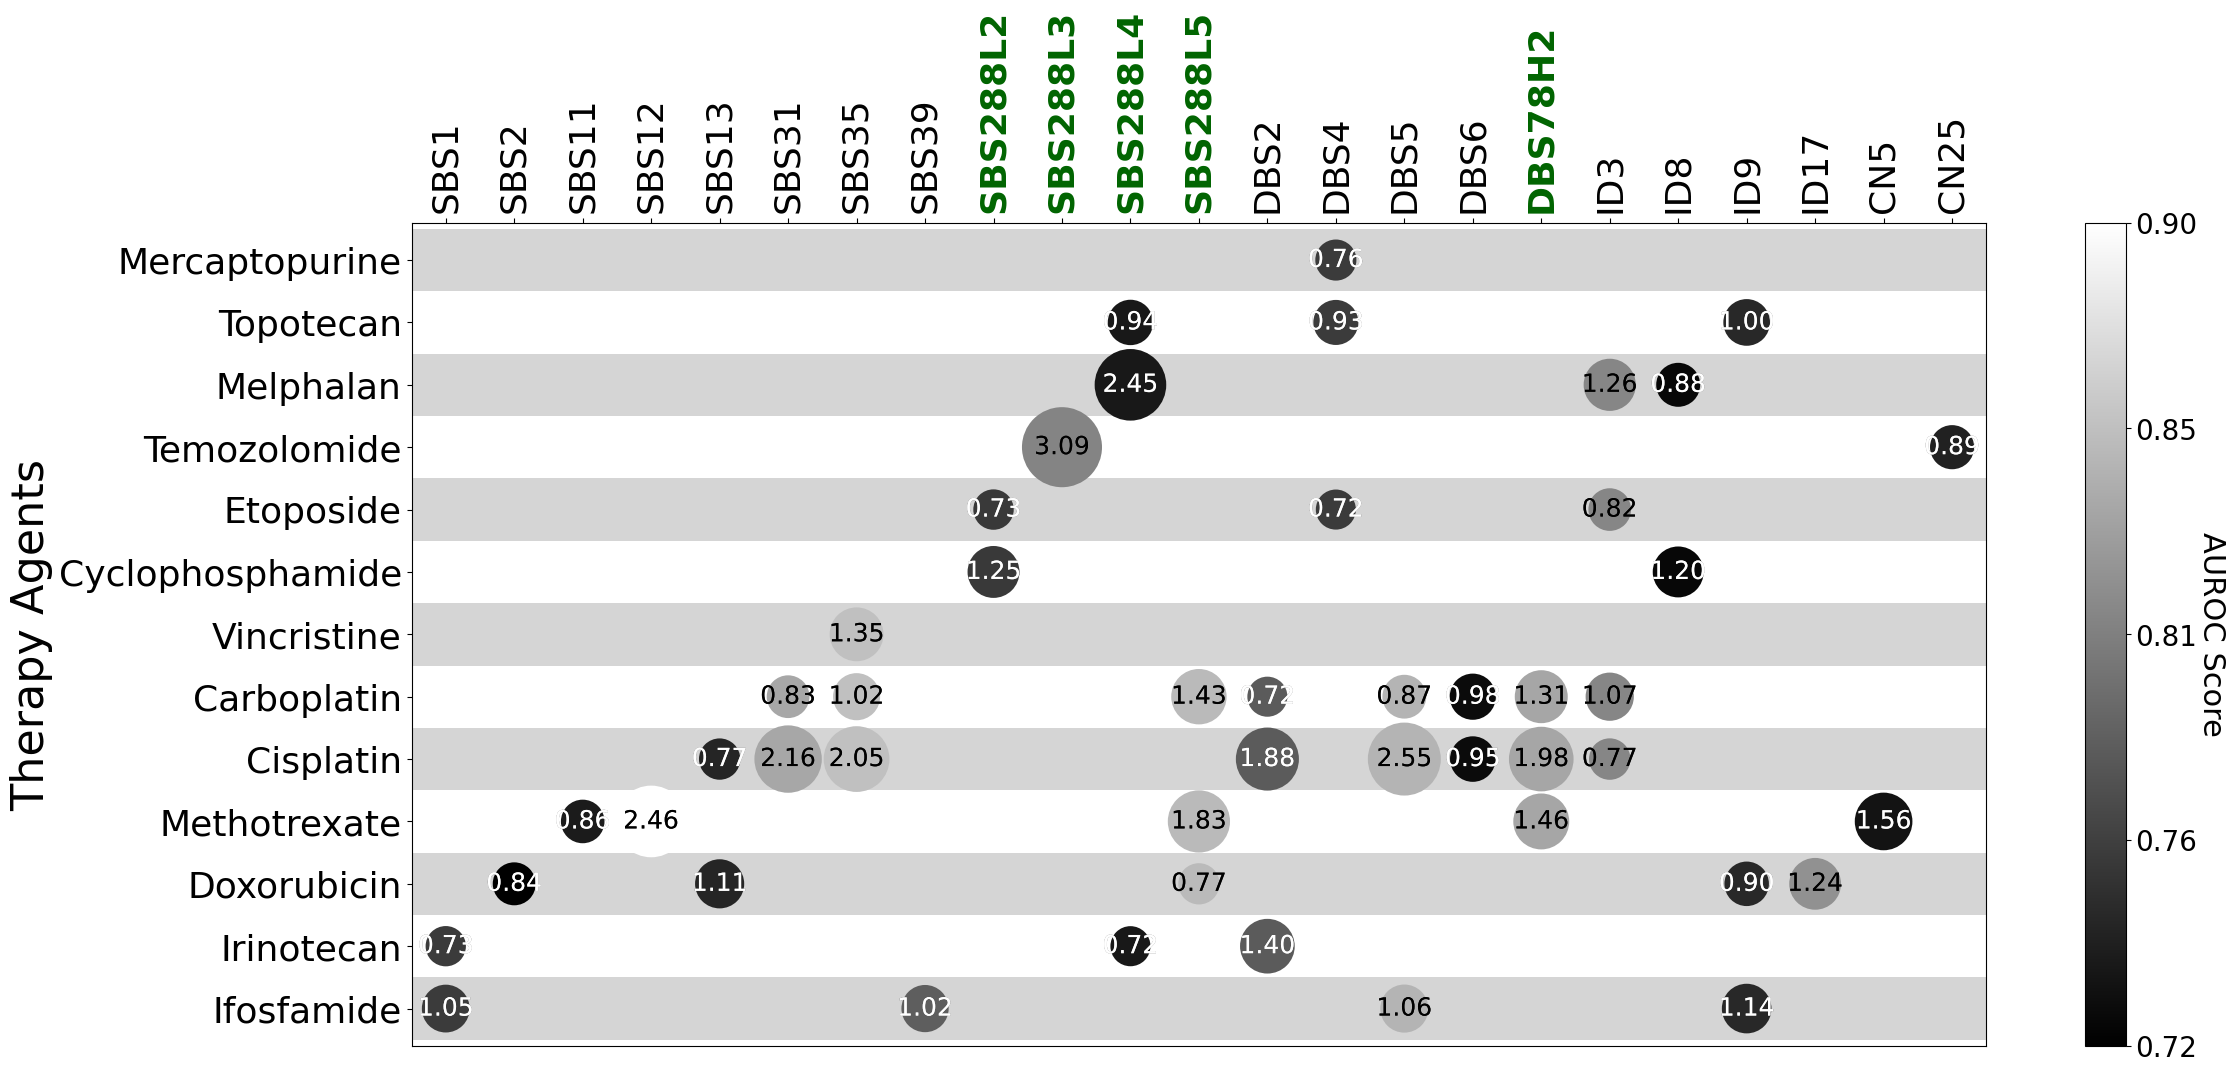

In [336]:
data = logreg_coefs[logreg_coefs.Condition=='agent_sigs_noX_all'].copy()
data = data[data.AUC>=0.7]

plotter.coefs_scatter(data, os.path.join(fig_out, 'Fig_3d_adj_rev.pdf'), positive_only=True, interactions='singles_only', ylab='Therapy Agents')